# RNN을 사용한 문장 생성
* 언어 모델을 활용한 문장 생성 수행
* seq2seq : sequence to sequence : 시계열에서 시계열로
    * 한 시계열 데이터를 다른 시계열 데이터로 변환
    * RNN 두 개를 연결하여 구현한다.
    * 기계 번역, 챗봇, 메일의 자동 답신 등 응용 가능
    
## 언어 모델을 사용한 문장 생성
* 기계 번역, 음성 인식, 문장 생성 등 응용 가능

### RNN을 사용한 문장 생성의 순서
LSTM 계층을 이용한 언어 모델 : 신경망 구성
![img](./images/fig_7-1.png)

Time LSTM, Time Affine 계층 : 시계열 데이터를 T개분 만큼 모아 처리

* 언어 모델에게 문장 생성시키는 순서
    * you say goodbye and I say hello. 말뭉치 학습한 언어 모델
    * I 단어를 입력으로 주면, 다음과 같은 확률분포 출력
        ![img](./images/fig_7-2.png)
        
        
언어 모델은 입력 단어에서 다음 출현 단어의 확률 분포를 출력한다.
이 결과를 기초로 다음 단어를 새로 생성하려면?

* 확률이 가장 높은 단어 선택
    * 결정적인 방법 : 결과가 일정하게 정해진다
* 확률적으로 선택
    * 확률에 맞게 선택하므로, 선택 단어는 매번 다를 수 있다.(그러나 확률이 높을수록 선택하기 쉬워짐)
    ![img](./images/fig_7-3.png)
    * 확률 분포로부터 샘플링 : say 선택된 경우
    
두 번째 단어 생성
* 첫 번째 선택한 단어 say를 다시 입력하여 그 다음 출현 단어 '확률적'으로 구하기
    ![img](./images/fig_7-4.png)

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import matplotlib.font_manager as fm
import matplotlib

font_path = '/Library/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
font_name =  fm.FontProperties(fname=font_path, size=10).get_name()

matplotlib.rc('font', family=font_name)
fm._rebuild()

### 문장 생성 구현
Rnnlm 클래스 상속해서 RnnlmGen 클래스 제작 및 문장 생성 메서드 추가
* 클래스 상속 : 기존 클래스를 계승하여 새로운 클래스 제작 메커내즘

        # 기반 클래스
        class Base():
        # 새로 정의할 클래스
        class New(Base):

In [3]:
# RnnlmGen
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax
from rnnlm import Rnnlm
from better_rnnlm import BetterRnnlm

class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids = None, sample_size = 100):
        word_ids = [start_id]
        
        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1,1)
            score = self.predict(x)
            p = softmax(score.flatten())
            
            sampled = np.random.choice(len(p), size = 1, p = p)
            if (skip_ids is none) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))
                
        return word_ids

In [7]:
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
# model.load_params('Rnnlm.pkl')

# 시작 문자와 건너뛰는 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you diplomatic automobile brown readily pont semiannual residence blamed democratic resistance control milwaukee mccormick found manufacturers entry measurements goodman discussed mcdonald suggests hardware competes friendship realize dorrance fake provided explosion robust halts fend volokh contentious innopac obstacle fashion issues proclaimed kasparov his richmond subscriber mccall specific suing cautiously beneath reoffered aug. gorky reopened 're dole roll meals nationally precision salaries purposes pete creek possibilities conversation eastern carter bonus waves existed anyway resorts evolution primerica artistic aides tank fate story estimated mentality additional adobe ashland stone step committee personal jupiter hurt lobbyist sights sen outperformed agencies vowed walt clarify conceptual sidewalk


In [8]:
' '.join(['you', 'say', 'goodbye'])

'you say goodbye'

join() 메서드는 구분자.join(리스트) 형태로 작성 : 리스트의 단어들 사이에 구분자를 삽입해 모두 연결

In [15]:
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('Rnnlm.pkl')

# 시작 문자와 건너뛰는 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you mystery it after a recent load low of the industry 's total of transferred capital names.
 it plans to meet a many management of the securities jaguar charged the publicly traded bid.
 this could force to announce a standard basis but eventually will make competition the next year.
 last spring will issue its price construction of a total of # a year down from year earlier.
 northwest technologies corp. reported this year of flat recent argues changes last march.
 nomura is a new year of trade mountain-bike and time are insured and milk.



### 더 좋은 문장으로
더 좋은 RNNLM 언어 모델을 구현한다. 퍼플렉시티를 75까지 개선한 좋은 모델의 문장 생성 실력을 본다.

In [22]:
!python3 generate_better_text.py

you can come with having hard experience.
 listed restrictions on the company 's financial auction helped ford buy a modest stock market let the market which has a bearing neither first said howard j. wyss jr. president and chief executive officer of first boston co. 's price-earnings unit in manhattan.
 travelers has consistently been retirement.
 closed oct. congress.
 many legislators claimed that the senate the president quit rolling power.
 but the integrity of federal judge in testimony to the staff 's political duties was at a top meeting in moscow and the white house 's
--------------------------------------------------
the meaning of life is in large quantities building zones.
 the senior services analyst also ends while the fema lenders ' appetite for government sales will have larger liabilities for the government.
 it is like discretionary in the payment of prices that ca n't be reduced until a dozen years ago.
 mr. marous said again if there are n't any serious response to

In [26]:
!python3 generate_better_text.py

you 'll fulfill the budget of our capital.
 i do n't know what many company like taking hong kong from the as we think are that much of the is one of the due people do not even face.
 the must be very very good says william head of brilliant trading at new york 's new york office who directs data preferences.
 falcon and most multinational companies now will favor the circumstances of america or expand their boards of.
 this would be a totally disturbing underlying general public.
 calm people such as many on the
--------------------------------------------------
the meaning of life is getting bad management for coca-cola co. a maker of packaging and electronic proteins.
 the authors include the national association of business and manufacturer of merchandise now and jewelry companies as well as possible representatives said michael sr. president and chief executive officer.
 it could upset that most products and even more significant quality of investment markets these days are in bei

### seq2seq
시계열 데이터를 또 다른 시계열 데이터로 변환한다.  
기계 번역, 음성 인식, 챗봇 애플리케이션, 컾파일러(소스 코드를 기계어로 변환 작업)

* seq2seq : 2개의 RNN을 이용하여, 시계열 데이터를 다른 시계열 데이터로 변환 모델

### seq2seq의 원리
* seq2seq : Encoder-Decoder 모델
    * 2개 모듈 : Encoder, Decoder 등장
    * Encoder : 입력 데이터를 인코딩, 부호화 한다.
    * Decoder : 인코딩 데이터를 디코딩, 복호화 한다.
    
![img](./images/fig_7-5.png)

* 언어 번역 : 출발어(번역할 대상 언어), 도착어(번역된 결과 언어)

![img](./images/fig_7-6.png)

* Encoder : RNN을 이용해 시계열 데이터를 h라는 은닉 상태 벡터로 변환
    * LSTM을 이용하지만, 단순한 RNN, GRU도 이용 가능하다.
    * 문장을 단어 단위로 쪼개 입력 가정
    
* h : LSTM 계층의 마지막 은닉 상태
    * 입력 문장을 번역하는 데 필요한 정보가 인코딩된다.
    * LSTM의 은닉 상태 h : 고정 길이 벡터
    * 인코딩한다 = 결국 임의 길이의 문장을 고정 길이 벡터(h)로 변환하는 작업이 된다.
    
![img](./images/fig_7-7.png)
![img](./images/fig_7-8.png)

* Decoder : 인코딩된 벡터로 도착어 문장 생성
    * 앞 적의 신경망과 완전히 같다.
    * 다만, LSTM 계층이 벡터 h를 입력받는다.
    * 이 차이로 번역이 가능한 Decoder로 바꿀 수 있다.
    
![img](./images/fig_7-9.png)

* seq2seq : 전체 계층
    * LSTM 두 개(Encoder + Decoder) 구성
    * LSTM 은닉 상태 : 두 개 LSTM을 이어주는 가교
    * 순전파 : Encoder 인코딩된 정보가 LSTM 계층의 은닉상태(가교)를 통해 Decoder 전달
    * 역전파 : 이 가교를 통해 기울기가 Decoder에서 Encoder로 전달

### 시계열 데이터 변환용 장난감 문제
![img](./images/fig_7-10.png)

* 더하기 문제
    * 57 + 5 : seq2seq : 62
    * 머신러닝을 평가하고자 만든 간단한 문제 : 장난감 문제(toy problem)
    
* seq2seq는 덧셈의 논리를 모른다 : 문자의 패턴을 학습해서 해결할 수 있을지를 확인한다
    * 단어가 아닌 문자 단위로 분할
    * 리스트로 처리한다.
    * "57 + 5"(단어) -> ['5'. '7', '+', '5'] (문자 단위)리스트로 처리


### 가변 길이 시계열 데이터
덧셈 문장과 대답은 문자 수가 문제마다 다르다.  
* 가변 길이 시계열 데이터 : 덧셈 문제는 샘플마다 데이터의 시간 방향 크기가 다르다.
    * 신경망 학습 시 미니배치 처리 : 추가 필요
* 패딩(padding) : 가변 길이 시계열 데이터를 미니배치로 학습하는 단순한 방법
    * 의미 없는 데이터(대표적으로 0)을 채워 모든 데이터 길이를 균일하게 맞춘다.
    * 덧셈 문제에 적용 : 공백을 채운다.
    ![img](./images/fig_7-11.png)
    
    
    
> Softmax with Loss 계층 : 마스크 적용



### 덧셈 데이터셋
* 덧셈 학습 데이터 : dataset/addtion.txt

In [40]:
import sys
sys.path.append('..')
from dataset import sequence

(x_train, t_train), (x_test, t_test) =  sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

print(x_train[0])
print(t_train[0])

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


* seq2seq용 데이터를 간단히 읽어 들일 수 있다.
* x_train, t_train : 문자 ID 저장
* char_to_id, id_to_char : 문자 ID와 문자의 대응 관계를 상호 변환 가능

## seq2seq 구현
* 2개의 RNN 연결한 신경망
    * 두 RNN을 Encoder 클래스와 Decoder 클래스로 각각 구현
    * 두 클래스 연결하는 Seq2seq 클래스 구현
    
### Encoder 클래스
![img](./images/fig_7-13.png)
문자열을 받아 벡터 h로 변환
![img](./images/fig_7-14.png)
* RNN으로 Encoder 구성한 결과 : LSTM 계층 이용
    * Encoder 클래스 : Embedding 계층 + LSTM 계층 구성
        * Embedding 계층 : 문자(문자 ID)를 문자 벡터로 변환
        * 문자 벡터가 LSTM 계층으로 입력
    
        * LSTM 계층
            * 오른쪽으로 은닉 상태와 셀 출력
            * 위쪽으로 은닉 상태만 출력
            * 그 위쪽 출력은 폐기
        * 마지막 문자를 처리한 후 LSTM 계층의 은닉 상태 h를 출력 후 Decoder로 전달

* 시간 방향을 한꺼번에 처리하는 계층 도입 : Time LSTM 계층, Time Embedding 계층
![img](./images/fig_7-15.png)




In [42]:
class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful = False)
        
        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None

* 초기화 메서드 인수 : vocab_size, wordvec_size, hidden_size
    * vocab_size : 어휘 수, 문자의 종류(총 13가지 문자)
    * wordvec_size : 문자 벡터의 차원 수
    * hidden_size : LSTM 계층의 은닉 상태 벡터의 차원 수
    * 가중치 매개변수 초기화 및 필요한 계층 생성
    * 가중치 매개변수와 기울기 : params, grads 리스트 저장
    * Time LSTM 계층이 상태 유지하지 않는다 : stateful= False 설정

In [43]:
def forward(self, xs):
    xs = self.embed.forward(xs)
    hs = self.lstm.forward(xs)
    self.hs = hs
    return hs[:, 1, :]

def backward(self, hd):
    dhs = np.zeros_like(self.hs)
    dhs[:, -1, :] = dh
    
    dout = self.lstm.backward(dhs)
    dout = self.embed.backward(dout)
    return dout

* Encoder 순전파
    * Time Embedding 계층과 Time LSTM 계층의 forward() 메서드 호출
    * Time LSTM 계층 마지막 시각의 은닉 상태만 추출
    * Encoder의 forward() 메서드 출력으로 반환
    
* Encoder 역전파
    * LSTM 계층 마지막 은닉 상태 기울기 : dh 인수로 전달
    * 원소가 모두 0인 dhs 생성
    * dh를 dhs 해당 위치에 할당
    * Time LSTM 계층과 Time Embedding 계층의 backward() 메서드 호출

### Decoder 클래스
![img](./images/fig_7-16.png)
* Encoder 클래스 h 받아 다른 문자열 출력
* RNN 구현 가능(LSTM 계층 사용)
![img](./images/fig_7-17.png)
* Decoder 학습 시 계층 구성
    * 정답 데이터 : _62
    * 입력 데이터 : ['_'.'6'. '2', '']
    * 출력 : ['6','2','','']이 되도록 학습

![img](./images/fig_7-18.png)
* '덧셈'문제 : 결정적으로 선택
    * agrmax 노드 : 최댓값을 가진 원소의 인덱스(문자ID) 선택하는 노드
    * Softmax 계층을 사용하지 않고, Affine 계층이 출력한 점수가 가장 큰 문자 ID 선택
    * Decoder : 학습 시와 생성 시 Softmax 계층을 다르게 취급
    * Softmax with Loss 계층 : Seq2seq 클래스에서 처리하므로 여기서는 무시(Time Softmax with Loss 앞까지 진행)
    ![img](./images/fig_7-19.png)


* Decoder 클래스 = Time Embedding, Time LSTM, Time Affine 3가지 계층 구성


In [44]:

class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, h):
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh

* 역전파
    * Softmax with Loss 계층에서 dscore 기울기 : Time Affine 계층, Time LSTM 계층, Time Embedding 계층 순서로 전파
    * Time LSTM 시간 방향으로 기울기 : Time LSTM 크랠스 인스턴스 변수 dh 저장
    * dh 꺼내어 Decoder 클래스 backward()의 출력으로 반환

In [46]:
# Decoder 클래스 문장생성 담당
def generate(self, h, start_id, sample_size):
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))

        return sampled

* generate() 메서드 : Decoder 클래스 문장 생성 담당
    * 인수 3개 : h, start_id, sample_size
    * h : Encoder 은닉 상태
    * start_id : 최초로 주어지는 문자 ID
    * sample_size : 생성하는 문자 수
    * 문자 1개 주고, Affine 계층이 출력하는 점수가 가장 큰 문자 ID 선택하는 작업 반복

### Seq2seq 클래스
* Encoder 클래스와 Decoder 클래스 연결
* Time Softmax with Loss 계층을 이용해 손실을 계산

In [50]:
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

* Encoder, Decoder 클래스에 구현된 기능을 제대로 연결하기만 하면 된다.

### seq2seq 평가
* seq2seq 학습 : 신경망의 학습
    * 학습 데이터에서 미니배치를 선택
    * 미니배치로부터 기울기 계산
    * 기울기를 사용해 매개변수 갱신

* Trainer 이용해 작업 수행
* 매 에폭마다 seq2seq 텍스트 데이터를 풀게 하여 학습 중간중간 정답률 측정

In [63]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 5[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 6[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 6[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 7[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 8[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 9[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 10[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 11[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 12[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 13[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 14[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
---
Q 

| 에폭 8 |  반복 61 / 351 | 시간 1[s] | 손실 1.08
| 에폭 8 |  반복 81 / 351 | 시간 2[s] | 손실 1.05
| 에폭 8 |  반복 101 / 351 | 시간 2[s] | 손실 1.04
| 에폭 8 |  반복 121 / 351 | 시간 3[s] | 손실 1.04
| 에폭 8 |  반복 141 / 351 | 시간 3[s] | 손실 1.04
| 에폭 8 |  반복 161 / 351 | 시간 4[s] | 손실 1.06
| 에폭 8 |  반복 181 / 351 | 시간 4[s] | 손실 1.07
| 에폭 8 |  반복 201 / 351 | 시간 5[s] | 손실 1.05
| 에폭 8 |  반복 221 / 351 | 시간 5[s] | 손실 1.02
| 에폭 8 |  반복 241 / 351 | 시간 6[s] | 손실 1.01
| 에폭 8 |  반복 261 / 351 | 시간 6[s] | 손실 1.02
| 에폭 8 |  반복 281 / 351 | 시간 7[s] | 손실 1.01
| 에폭 8 |  반복 301 / 351 | 시간 7[s] | 손실 1.01
| 에폭 8 |  반복 321 / 351 | 시간 8[s] | 손실 1.02
| 에폭 8 |  반복 341 / 351 | 시간 8[s] | 손실 1.00
Q 77+85  
T 162 
☒ 156 
---
Q 975+164
T 1139
☒ 1160
---
Q 582+84 
T 666 
☒ 656 
---
Q 8+155  
T 163 
☑ 163 
---
Q 367+55 
T 422 
☒ 432 
---
Q 600+257
T 857 
☒ 838 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1410
---
Q 26+838 
T 864 
☒ 861 
---
Q 143+93 
T 236 
☒ 227 
---
검증 정확도 5.000%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.99
| 에폭 9 |  반복 21 / 351 

| 에폭 15 |  반복 81 / 351 | 시간 2[s] | 손실 0.86
| 에폭 15 |  반복 101 / 351 | 시간 2[s] | 손실 0.87
| 에폭 15 |  반복 121 / 351 | 시간 3[s] | 손실 0.85
| 에폭 15 |  반복 141 / 351 | 시간 3[s] | 손실 0.86
| 에폭 15 |  반복 161 / 351 | 시간 4[s] | 손실 0.88
| 에폭 15 |  반복 181 / 351 | 시간 4[s] | 손실 0.89
| 에폭 15 |  반복 201 / 351 | 시간 5[s] | 손실 0.90
| 에폭 15 |  반복 221 / 351 | 시간 5[s] | 손실 0.86
| 에폭 15 |  반복 241 / 351 | 시간 6[s] | 손실 0.89
| 에폭 15 |  반복 261 / 351 | 시간 6[s] | 손실 0.89
| 에폭 15 |  반복 281 / 351 | 시간 7[s] | 손실 0.87
| 에폭 15 |  반복 301 / 351 | 시간 7[s] | 손실 0.86
| 에폭 15 |  반복 321 / 351 | 시간 8[s] | 손실 0.91
| 에폭 15 |  반복 341 / 351 | 시간 8[s] | 손실 0.97
Q 77+85  
T 162 
☒ 164 
---
Q 975+164
T 1139
☒ 1138
---
Q 582+84 
T 666 
☒ 676 
---
Q 8+155  
T 163 
☒ 158 
---
Q 367+55 
T 422 
☒ 421 
---
Q 600+257
T 857 
☒ 849 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1404
---
Q 26+838 
T 864 
☒ 861 
---
Q 143+93 
T 236 
☒ 237 
---
검증 정확도 7.220%
| 에폭 16 |  반복 1 / 351 | 시간 0[s] | 손실 0.87
| 에폭 16 |  반복 21 / 351 | 시간 0[s] | 손실 0.87
| 에폭 1

| 에폭 22 |  반복 101 / 351 | 시간 2[s] | 손실 0.79
| 에폭 22 |  반복 121 / 351 | 시간 2[s] | 손실 0.83
| 에폭 22 |  반복 141 / 351 | 시간 3[s] | 손실 0.81
| 에폭 22 |  반복 161 / 351 | 시간 3[s] | 손실 0.82
| 에폭 22 |  반복 181 / 351 | 시간 4[s] | 손실 0.83
| 에폭 22 |  반복 201 / 351 | 시간 4[s] | 손실 0.80
| 에폭 22 |  반복 221 / 351 | 시간 5[s] | 손실 0.83
| 에폭 22 |  반복 241 / 351 | 시간 5[s] | 손실 0.79
| 에폭 22 |  반복 261 / 351 | 시간 6[s] | 손실 0.80
| 에폭 22 |  반복 281 / 351 | 시간 6[s] | 손실 0.80
| 에폭 22 |  반복 301 / 351 | 시간 7[s] | 손실 0.79
| 에폭 22 |  반복 321 / 351 | 시간 7[s] | 손실 0.80
| 에폭 22 |  반복 341 / 351 | 시간 8[s] | 손실 0.78
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☒ 1137
---
Q 582+84 
T 666 
☒ 655 
---
Q 8+155  
T 163 
☒ 167 
---
Q 367+55 
T 422 
☒ 419 
---
Q 600+257
T 857 
☒ 845 
---
Q 761+292
T 1053
☒ 1049
---
Q 830+597
T 1427
☒ 1430
---
Q 26+838 
T 864 
☒ 857 
---
Q 143+93 
T 236 
☒ 247 
---
검증 정확도 7.640%
| 에폭 23 |  반복 1 / 351 | 시간 0[s] | 손실 0.80
| 에폭 23 |  반복 21 / 351 | 시간 0[s] | 손실 0.79
| 에폭 23 |  반복 41 / 351 | 시간 1[s] | 손실 0.77
| 에폭 2

* 신경망 학습용 코드 + 평가 척도 : 정답률
    * 에폭마다 테스트 데이터 문제 일부를 풀어서 올바르게 답했는지 채점
* 정답률 측정 : eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse) 메서드 활용
    * 문제를 모델에 주고, 문자열을 생성하여 답(correct)와 같은 지 판정
    * 모델 답이 맞으면 1, 틀리면 0 반환

10% 정답률을 기록하고, 중지한다.  
더 개선할 수 있을 것 같다.

## seq2seq 개선
### 입력 데이터 반전(Reverse)
![img](./images/fig_7-23.png)

* 입력 데이터 순서를 반전시키기
    * 학습 진행이 빨라져서 최종 정확도가 좋아진다.
    * 배열의 행을 반전시키고자 x_train[:, ::-1] 표기법 사용한다.

In [67]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]


# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0


model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list1 = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list1.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 2[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 2[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 3[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 4[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 4[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 5[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 5[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 6[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 6[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 7[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 8[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 9[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 9[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 10[s] | 손실 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48+285
T 666 
☒ 1001
---
Q   551+8
T 163 
☒ 100 
---
Q  55+763
T 422 
☒ 1001
---
Q 752+006
T 857 
☒ 1000
---
Q 292+167
T 1053
☒ 1000
---
Q 795+038
T 1427
☒ 1000
---
Q  838+

| 에폭 8 |  반복 61 / 351 | 시간 1[s] | 손실 0.61
| 에폭 8 |  반복 81 / 351 | 시간 2[s] | 손실 0.61
| 에폭 8 |  반복 101 / 351 | 시간 2[s] | 손실 0.61
| 에폭 8 |  반복 121 / 351 | 시간 3[s] | 손실 0.60
| 에폭 8 |  반복 141 / 351 | 시간 3[s] | 손실 0.60
| 에폭 8 |  반복 161 / 351 | 시간 3[s] | 손실 0.59
| 에폭 8 |  반복 181 / 351 | 시간 4[s] | 손실 0.58
| 에폭 8 |  반복 201 / 351 | 시간 4[s] | 손실 0.59
| 에폭 8 |  반복 221 / 351 | 시간 5[s] | 손실 0.60
| 에폭 8 |  반복 241 / 351 | 시간 5[s] | 손실 0.59
| 에폭 8 |  반복 261 / 351 | 시간 6[s] | 손실 0.58
| 에폭 8 |  반복 281 / 351 | 시간 7[s] | 손실 0.59
| 에폭 8 |  반복 301 / 351 | 시간 7[s] | 손실 0.58
| 에폭 8 |  반복 321 / 351 | 시간 8[s] | 손실 0.57
| 에폭 8 |  반복 341 / 351 | 시간 8[s] | 손실 0.57
Q   58+77
T 162 
☒ 163 
---
Q 461+579
T 1139
☒ 1134
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☒ 162 
---
Q  55+763
T 422 
☒ 423 
---
Q 752+006
T 857 
☒ 759 
---
Q 292+167
T 1053
☑ 1053
---
Q 795+038
T 1427
☒ 1431
---
Q  838+62
T 864 
☒ 866 
---
Q  39+341
T 236 
☒ 238 
---
검증 정확도 23.080%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.55
| 에폭 9 |  반복 21 / 351

| 에폭 15 |  반복 81 / 351 | 시간 2[s] | 손실 0.38
| 에폭 15 |  반복 101 / 351 | 시간 3[s] | 손실 0.38
| 에폭 15 |  반복 121 / 351 | 시간 3[s] | 손실 0.38
| 에폭 15 |  반복 141 / 351 | 시간 4[s] | 손실 0.38
| 에폭 15 |  반복 161 / 351 | 시간 5[s] | 손실 0.38
| 에폭 15 |  반복 181 / 351 | 시간 5[s] | 손실 0.38
| 에폭 15 |  반복 201 / 351 | 시간 6[s] | 손실 0.38
| 에폭 15 |  반복 221 / 351 | 시간 6[s] | 손실 0.39
| 에폭 15 |  반복 241 / 351 | 시간 7[s] | 손실 0.38
| 에폭 15 |  반복 261 / 351 | 시간 7[s] | 손실 0.37
| 에폭 15 |  반복 281 / 351 | 시간 8[s] | 손실 0.37
| 에폭 15 |  반복 301 / 351 | 시간 8[s] | 손실 0.39
| 에폭 15 |  반복 321 / 351 | 시간 9[s] | 손실 0.39
| 에폭 15 |  반복 341 / 351 | 시간 9[s] | 손실 0.37
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☒ 1137
---
Q  48+285
T 666 
☒ 667 
---
Q   551+8
T 163 
☒ 164 
---
Q  55+763
T 422 
☒ 420 
---
Q 752+006
T 857 
☒ 856 
---
Q 292+167
T 1053
☒ 1052
---
Q 795+038
T 1427
☒ 1431
---
Q  838+62
T 864 
☑ 864 
---
Q  39+341
T 236 
☒ 237 
---
검증 정확도 41.100%
| 에폭 16 |  반복 1 / 351 | 시간 0[s] | 손실 0.36
| 에폭 16 |  반복 21 / 351 | 시간 0[s] | 손실 0.36
| 에폭 

| 에폭 22 |  반복 81 / 351 | 시간 2[s] | 손실 0.29
| 에폭 22 |  반복 101 / 351 | 시간 2[s] | 손실 0.28
| 에폭 22 |  반복 121 / 351 | 시간 3[s] | 손실 0.29
| 에폭 22 |  반복 141 / 351 | 시간 3[s] | 손실 0.31
| 에폭 22 |  반복 161 / 351 | 시간 4[s] | 손실 0.31
| 에폭 22 |  반복 181 / 351 | 시간 4[s] | 손실 0.30
| 에폭 22 |  반복 201 / 351 | 시간 5[s] | 손실 0.28
| 에폭 22 |  반복 221 / 351 | 시간 5[s] | 손실 0.32
| 에폭 22 |  반복 241 / 351 | 시간 6[s] | 손실 0.33
| 에폭 22 |  반복 261 / 351 | 시간 6[s] | 손실 0.32
| 에폭 22 |  반복 281 / 351 | 시간 7[s] | 손실 0.31
| 에폭 22 |  반복 301 / 351 | 시간 7[s] | 손실 0.30
| 에폭 22 |  반복 321 / 351 | 시간 8[s] | 손실 0.29
| 에폭 22 |  반복 341 / 351 | 시간 8[s] | 손실 0.31
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☑ 1139
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☒ 423 
---
Q 752+006
T 857 
☒ 856 
---
Q 292+167
T 1053
☑ 1053
---
Q 795+038
T 1427
☒ 1430
---
Q  838+62
T 864 
☒ 865 
---
Q  39+341
T 236 
☒ 238 
---
검증 정확도 47.740%
| 에폭 23 |  반복 1 / 351 | 시간 0[s] | 손실 0.31
| 에폭 23 |  반복 21 / 351 | 시간 0[s] | 손실 0.31
| 에폭 

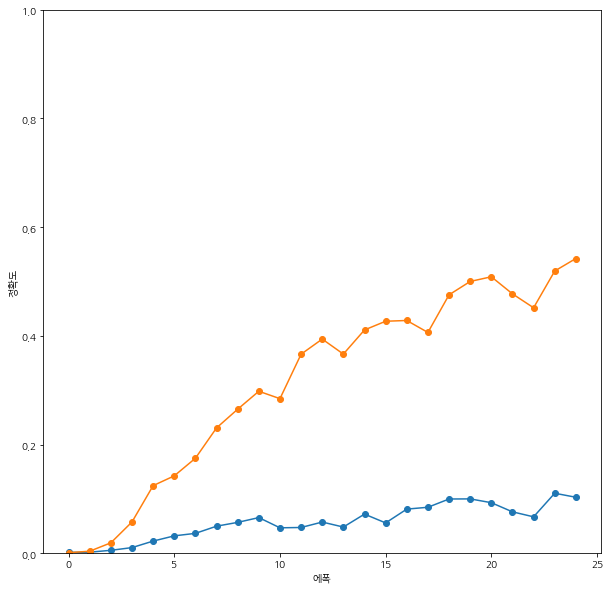

In [69]:
# 그래프 그리기
#plt.figure(figsize=(5,5))
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.plot(x, acc_list1, marker='D')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

* 배열의 행을 반전 : x_train[:, ::-1] 표기법 사용
* 개선된 결과는 다음과 같다.
![img](./images/fig_7-24.png)
* 25 에폭에서 정답률 50%까지 상승한다.
* 데이터 반전의 효과가 좋다.
    * 기울기 전파가 원활해지기 때문이다.
    * 예를 들어, '나'와 'I' 단어가 가까워지므로, 더 학습 효율이 좋아진다.
    * 단어 사이에 평균적인 거리는 동일하다.

### 엿보기(Peeky)
seq2seq 두 번째 개선
* 첫번째 LSTM 계층만이 벡터 h를 이용한다.
![img](./images/fig_7-25.png)

* h를 더 활용할 방안이 필요하다.
* 중요한 정보를 담은 Encoder 출력 h를 Decoder 다른 계층에도 전달한다.
![img](./images/fig_7-26.png)

* 모든 시각의 Affine 계층과 LSTM 계층에 Encoder 출력 h를 전달
* 중요 정보를 많은 사람과 공유한다면 더 올바른 결정을 내릴 가능성이 커진다.
* 인코딩 정보를 다른 계층도 '엿본다'라고 해석할 수 있다. 영어로 peek이므로 이 개선을 더한 Decoder를 Peeky Decoder
* 이를 활용한 seq2seq를 'Peeky seq2seq'라고 한다.

* 위 그림에서 LSTM과 Affine 계층에 입력 벡터가 2개씩 되었고, 실제로는 두 벡터가 연결(concatenate)된 것이다.
* concat 노드 추가한 결과
![img](./images/fig_7-27.png)



In [64]:
    class PeekyDecoder:
        def __init__(self, vocab_size, wordvec_size, hidden_size):
            V, D, H = vocab_size, wordvec_size, hidden_size
            rn = np.random.randn

            embed_W = (rn(V, D) / 100).astype('f')
            lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
            lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
            lstm_b = np.zeros(4 * H).astype('f')
            affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
            affine_b = np.zeros(V).astype('f')

            self.embed = TimeEmbedding(embed_W)
            self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
            self.affine = TimeAffine(affine_W, affine_b)

            self.params, self.grads = [], []
            for layer in (self.embed, self.lstm, self.affine):
                self.params += layer.params
                self.grads += layer.grads
            self.cache = None

        def forward(self, xs, h):
            N, T = xs.shape
            N, H = h.shape

            self.lstm.set_state(h)

            out = self.embed.forward(xs)
            hs = np.repeat(h, T, axis=0).reshape(N, T, H)
            out = np.concatenate((hs, out), axis=2)

            out = self.lstm.forward(out)
            out = np.concatenate((hs, out), axis=2)

            score = self.affine.forward(out)
            self.cache = H
            return score

* PeekyDecoder 초기화는 앞 절 Decoder와 동일하다.
* 차이점 : LSTM 계층 가중치와 Affine 계층 가중치의 형상
    * Encoder 인코딩한 벡터도 입력되므로 가중치 형상 커진다.
    
* forward() 구현
* h : np.repeat()로 시계열만큼 복제해서 hs 저장

        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)
* np.concatenate()
    * LSTM 계층 :  hs, Embedding 계층 출력 연결 후 입력
    * Affine 계층 : hs, LSTM 계층의 출력을 연결 후 입력
    
           out = np.concatenate((hs, out), axis=2)

* PeekyDecoder를 활용하고 나머지 로직은 동일하다.
    * 앞부분은 계승하여 해결한다.(상속)
    * 초기화 부분만 변경한다.

In [65]:
class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

* 학습용 코드에서 Seq2seq 클래스 : PeekySeq2seq 클래스로 변경

        # model = Seq2seq(vocab_size, wordvec_size, hideen_size)
        model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
        
* Reverse(입력 반전) 적용 후 수행

In [68]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]


# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 엿보기 설정
# model = Seq2seq(vocab_size, wordvec_size, hideen_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list2 = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list2.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.99
| 에폭 1 |  반복 81 / 351 | 시간 2[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 2[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 3[s] | 손실 1.82
| 에폭 1 |  반복 141 / 351 | 시간 4[s] | 손실 1.80
| 에폭 1 |  반복 161 / 351 | 시간 4[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 5[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 5[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 6[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 7[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 7[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 8[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 8[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 9[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 9[s] | 손실 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1013
---
Q  48+285
T 666 
☒ 102 
---
Q   551+8
T 163 
☒ 100 
---
Q  55+763
T 422 
☒ 1023
---
Q 752+006
T 857 
☒ 1023
---
Q 292+167
T 1053
☒ 1023
---
Q 795+038
T 1427
☒ 1111
---
Q  838+6

| 에폭 8 |  반복 61 / 351 | 시간 1[s] | 손실 0.48
| 에폭 8 |  반복 81 / 351 | 시간 2[s] | 손실 0.47
| 에폭 8 |  반복 101 / 351 | 시간 2[s] | 손실 0.46
| 에폭 8 |  반복 121 / 351 | 시간 3[s] | 손실 0.46
| 에폭 8 |  반복 141 / 351 | 시간 3[s] | 손실 0.44
| 에폭 8 |  반복 161 / 351 | 시간 4[s] | 손실 0.41
| 에폭 8 |  반복 181 / 351 | 시간 4[s] | 손실 0.42
| 에폭 8 |  반복 201 / 351 | 시간 5[s] | 손실 0.41
| 에폭 8 |  반복 221 / 351 | 시간 5[s] | 손실 0.40
| 에폭 8 |  반복 241 / 351 | 시간 6[s] | 손실 0.39
| 에폭 8 |  반복 261 / 351 | 시간 7[s] | 손실 0.37
| 에폭 8 |  반복 281 / 351 | 시간 7[s] | 손실 0.36
| 에폭 8 |  반복 301 / 351 | 시간 8[s] | 손실 0.36
| 에폭 8 |  반복 321 / 351 | 시간 8[s] | 손실 0.35
| 에폭 8 |  반복 341 / 351 | 시간 9[s] | 손실 0.34
Q   58+77
T 162 
☒ 161 
---
Q 461+579
T 1139
☑ 1139
---
Q  48+285
T 666 
☒ 657 
---
Q   551+8
T 163 
☒ 155 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☑ 857 
---
Q 292+167
T 1053
☑ 1053
---
Q 795+038
T 1427
☒ 1438
---
Q  838+62
T 864 
☑ 864 
---
Q  39+341
T 236 
☑ 236 
---
검증 정확도 65.060%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.32
| 에폭 9 |  반복 21 / 351

| 에폭 15 |  반복 81 / 351 | 시간 2[s] | 손실 0.04
| 에폭 15 |  반복 101 / 351 | 시간 2[s] | 손실 0.05
| 에폭 15 |  반복 121 / 351 | 시간 3[s] | 손실 0.04
| 에폭 15 |  반복 141 / 351 | 시간 3[s] | 손실 0.04
| 에폭 15 |  반복 161 / 351 | 시간 4[s] | 손실 0.05
| 에폭 15 |  반복 181 / 351 | 시간 5[s] | 손실 0.05
| 에폭 15 |  반복 201 / 351 | 시간 5[s] | 손실 0.04
| 에폭 15 |  반복 221 / 351 | 시간 6[s] | 손실 0.04
| 에폭 15 |  반복 241 / 351 | 시간 6[s] | 손실 0.04
| 에폭 15 |  반복 261 / 351 | 시간 7[s] | 손실 0.04
| 에폭 15 |  반복 281 / 351 | 시간 7[s] | 손실 0.04
| 에폭 15 |  반복 301 / 351 | 시간 8[s] | 손실 0.04
| 에폭 15 |  반복 321 / 351 | 시간 8[s] | 손실 0.04
| 에폭 15 |  반복 341 / 351 | 시간 9[s] | 손실 0.04
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☒ 1149
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☑ 857 
---
Q 292+167
T 1053
☑ 1053
---
Q 795+038
T 1427
☑ 1427
---
Q  838+62
T 864 
☑ 864 
---
Q  39+341
T 236 
☑ 236 
---
검증 정확도 95.380%
| 에폭 16 |  반복 1 / 351 | 시간 0[s] | 손실 0.03
| 에폭 16 |  반복 21 / 351 | 시간 0[s] | 손실 0.04
| 에폭 

| 에폭 22 |  반복 81 / 351 | 시간 2[s] | 손실 0.02
| 에폭 22 |  반복 101 / 351 | 시간 2[s] | 손실 0.03
| 에폭 22 |  반복 121 / 351 | 시간 3[s] | 손실 0.04
| 에폭 22 |  반복 141 / 351 | 시간 4[s] | 손실 0.04
| 에폭 22 |  반복 161 / 351 | 시간 4[s] | 손실 0.03
| 에폭 22 |  반복 181 / 351 | 시간 5[s] | 손실 0.03
| 에폭 22 |  반복 201 / 351 | 시간 5[s] | 손실 0.04
| 에폭 22 |  반복 221 / 351 | 시간 6[s] | 손실 0.03
| 에폭 22 |  반복 241 / 351 | 시간 6[s] | 손실 0.04
| 에폭 22 |  반복 261 / 351 | 시간 7[s] | 손실 0.03
| 에폭 22 |  반복 281 / 351 | 시간 8[s] | 손실 0.02
| 에폭 22 |  반복 301 / 351 | 시간 8[s] | 손실 0.02
| 에폭 22 |  반복 321 / 351 | 시간 9[s] | 손실 0.02
| 에폭 22 |  반복 341 / 351 | 시간 9[s] | 손실 0.02
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☑ 1139
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☑ 857 
---
Q 292+167
T 1053
☑ 1053
---
Q 795+038
T 1427
☑ 1427
---
Q  838+62
T 864 
☑ 864 
---
Q  39+341
T 236 
☑ 236 
---
검증 정확도 95.800%
| 에폭 23 |  반복 1 / 351 | 시간 0[s] | 손실 0.02
| 에폭 23 |  반복 21 / 351 | 시간 0[s] | 손실 0.02
| 에폭 

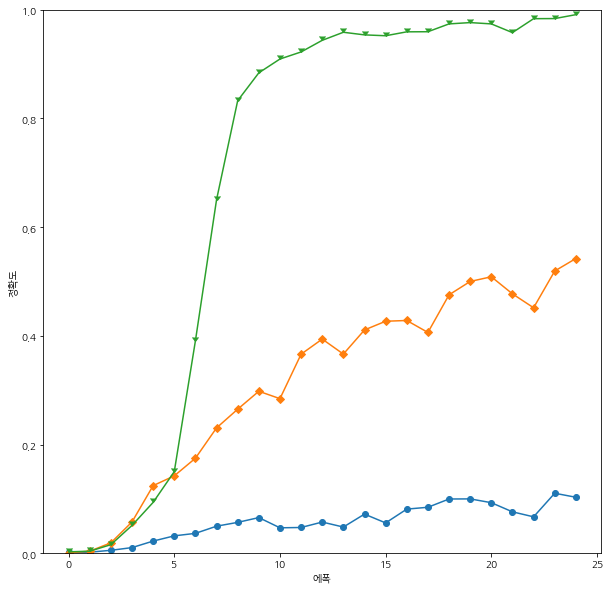

In [70]:
# 그래프 그리기
#plt.figure(figsize=(5,5))
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.plot(x, acc_list1, marker='D')
plt.plot(x, acc_list2, marker=7)
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

최종 결과 비교는 다음과 같다.
![img](./images/fig_7-28.png)

* Peeky를 추가하면 월등히 좋아진다.
    * 최종적으로 100%에 가까워진다.
* Reverse + Peeky 효과적으로 작동한다.
    * 이는 작은 개선이고, 큰 개선은 **어텐션**이 수행한다.
    * Peeky를 이용하면, 가중치 매개변수가 커져서 계산량도 늘어난다.
    * 커진 매개변수만큼 핸디캡을 감안해야 한다.
* seq2seq의 정확도 : 하이퍼파라미터 영향을 크게 받으므로, 실제 문제에서는 그 효과가 다를 수 있다.

## seq2seq를 이용하는 애플리케이션
* seq2seq : 한 시계열 데이터를 다른 시계열 데이터로 변환하며 다양한 문제 적용 가능
    * 기계 번역
    * 자동 요약
    * 질의응답
    * 메일 자동 응답
* 2개가 짝을 이루는 시계열 데이터를 다루는 문제에 이용 가능 : 자연어 외 음성이나 영상 이용 가능

### 챗봇
* 챗봇 : 사람과 컴퓨터가 텍스트로 대화를 나누는 프로그램
* seq2seq 사용 가능 : 대화(= 상대의 말 + 자신의 말)
    * 상대의 말을 자신의 말로 변환하는 문제
    * 대화의 텍스트 데이터 준비되면 그걸로 seq2seq 학습 가능
    
![img](./images/fig_7-29.png)
* VPN 연결이 안 된 사람을 그 문제 해결 가능한 URL 링크로 안내한다.
* 범용적으로 이용은 어렵다.

### 알고리즘 학습
덧셈보다 더 고차원적인 파이썬 코드도 처리할 수 있다.
![img](./images/fig_7-30.png)

* 소스 코드 : 문자로 쓰여진 시계열 데이터
    * 코드를 하나의 문장으로 처리할 수 있다.
    * 줄바꿈 : 개행 코드로 처리
    * 소스 코드 그대로 seq2seq 입력 및 원하는 답과 대조하여 학습 가능
* if, for 문 문제는 쉽지 않지만, seq2seq 틀에서 처리 가능하다.
* NTM(Neural Tuning Machine) 모델 : 컴퓨터가 메모리 읽고 쓰는 순서를 학습하여 알고리즘 재현

### 이미지 캡셔닝
* seq2seq : 텍스트 외에 이미지, 음성 처리 가능하다.
* 이미지 캡셔닝(Image Captioning) : 이미지를 문장으로 변환한다.

![img](./images/fig_7-31.png)

* Encoder가 LSTM이 아니라 CNN 합성곱 신경망으로 변경했다.
* Decoder는 동일하다.
* 이러한 변경으로 seq2seq가 이미지 처리할 수 있다.

* CNN 최종 출력 : 특징 맵(feature map)
    * 특징 맵 : 3차원(높이, 폭, 채널)이므로 이를 Decoder의 LSTM이 처리하도록 손질한다.
    * CNN 특징맵을 1차원으로 평탄화(flatten) 후 완전연결 Affine 계층에서 변환한다.
    * 변환된 데이터를 Decoder에 전달시 문장 생성 가능
    
* CNN에 VGG, ResNet 등 입증된 신경망 사용
* 가중치로는 다른 이미지 데이터셋(ImageNet 등) 학습된 걸 이용한다. 좋은 인코딩 얻고 좋은 문장 생성이 가능하다.

* im2txt : 텐서플로 코드로 생성된 예시 참고
![img](./images/fig_7-32.png)

* 비결은 이미지와 설명을 많이 담은 학습 데이터에 있다.
    * 그 학습 데이터를 효율적으로 배우는 seq2seq가 있다.


## 정리
* 6장에서 다룬 RNN을 사용한 언어 모델에 문장을 생성하는 기능을 추가한다.
* seq2seq에게 간단한 덧셈 문제 학습시키는 데 성공했다.
* seq2seq : Encoder + Decoder 연결 모델로 2개의 RNN 조합한 단순한 구조
    * 단순하지만 큰 가능성이 있어 응용하기 좋다.
* seq2seq 개선 아이디어 2가지 : Reverse, Peeky
    * 직접 구현하고 평가해서 그 효과를 확인한다. 다음 장에는 어텐션으로 더 개선할 예쩡이다.

* 배운 내용
    * RNN 이용한 언어 모델은 새로운 문장을 생성할 수 있다.
    * 문장을 생성할 때는 하나의 단어(문자)를 주고 모델의 출력(확률분포)에서 샘플링하는 과정을 반복한다.
    * RNN 2개 조합함으로써 시계열 데이터를 다른 시계열 데이터로 변환할 수 있다.
    * seq2seq는 Encoder가 출발어 입력문을 인코딩하고, 인코딩된 정보를 Decoder가 받아 디코딩하여 도착어 출력문을 얻는다.
    * 입력문을 반전시키는 기법(Reverse), 또는 인코딩된 정보를 Decoder의 여러 계층에 전달하는 기법(Peeky)은 seq2seq의 정확도 향상에 효과적이다.
    * 기계 번역, 챗봇, 이미지 캡셔닝 등 seq2seq는 다양한 애플리케이션에 이용할 수 있다.